<a href="https://colab.research.google.com/github/ranaharsh0521/OBISIB/blob/main/Unemployment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score , mean_absolute_error , mean_squared_error
import warnings

warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/ranaharsh0521/OBISIB/main/Unemployment_in_India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [10]:
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [11]:
# If there are missing values , handel them (e.g by filling or dropping)

df.fillna(method='ffill' , inplace=True)  # Forward fill missing value
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [12]:
df[' Frequency'].value_counts()

,count
Frequency,
Monthly,395
Monthly,373


In [13]:
df[' Frequency'] = df[' Frequency'].replace(" Monthly" , 'Monthly')

In [14]:
df[' Frequency'].value_counts()

,count
Frequency,
Monthly,768


In [15]:
df['Region'].value_counts()

,count
Region,
West Bengal,56
Andhra Pradesh,28
Chhattisgarh,28
Bihar,28
Karnataka,28
Gujarat,28
Haryana,28
Himachal Pradesh,28
Jharkhand,28


In [16]:
df.duplicated().sum()

np.int64(28)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),768.0,1.162797e+01,1.056637e+01,0.00,4.72,8.35,1.547250e+01,76.74
Estimated Employed,768.0,7.494411e+06,8.160679e+06,49420.00,1376532.50,5064048.50,1.140351e+07,45777509.00
Estimated Labour Participation Rate (%),768.0,4.249796e+01,7.995346e+00,13.33,37.93,40.87,4.536250e+01,72.57


In [18]:
df.shape

(768, 7)

In [19]:
df[' Frequency'].value_counts()
df.duplicated().sum()
df = df.drop_duplicates()

In [20]:
df.shape

(740, 7)

In [21]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [22]:
df[['Day','Month','Year']] = df[' Date'].str.split("-" , expand=True)

In [23]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,31,05,2019
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,30,06,2019
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,31,07,2019
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,31,08,2019
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,30,09,2019


In [24]:
df.drop(columns=[' Frequency'] , axis=1 , inplace=True)

In [25]:
df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,Rural,31,05,2019
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,Rural,30,06,2019
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,Rural,31,07,2019
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,Rural,31,08,2019
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,Rural,30,09,2019


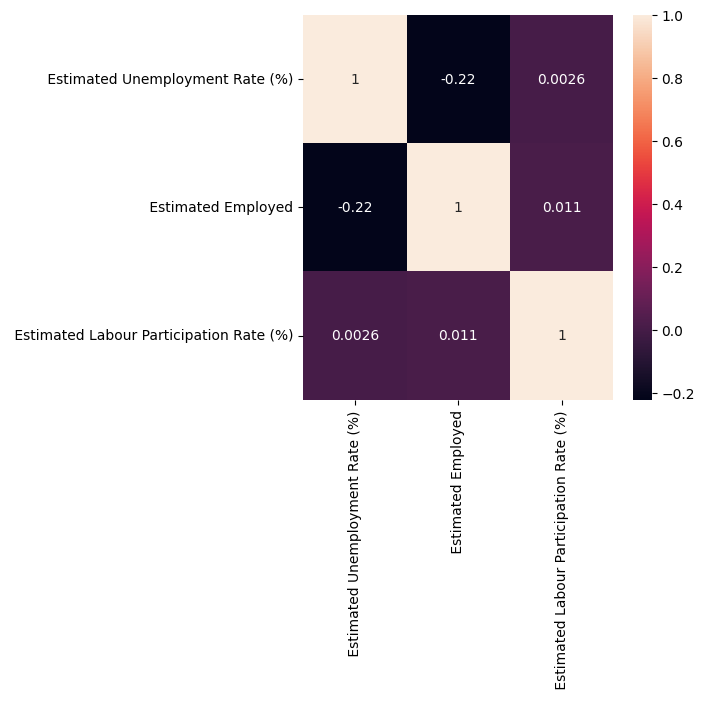

In [26]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(numeric_only=True) , annot=True)
plt.show()

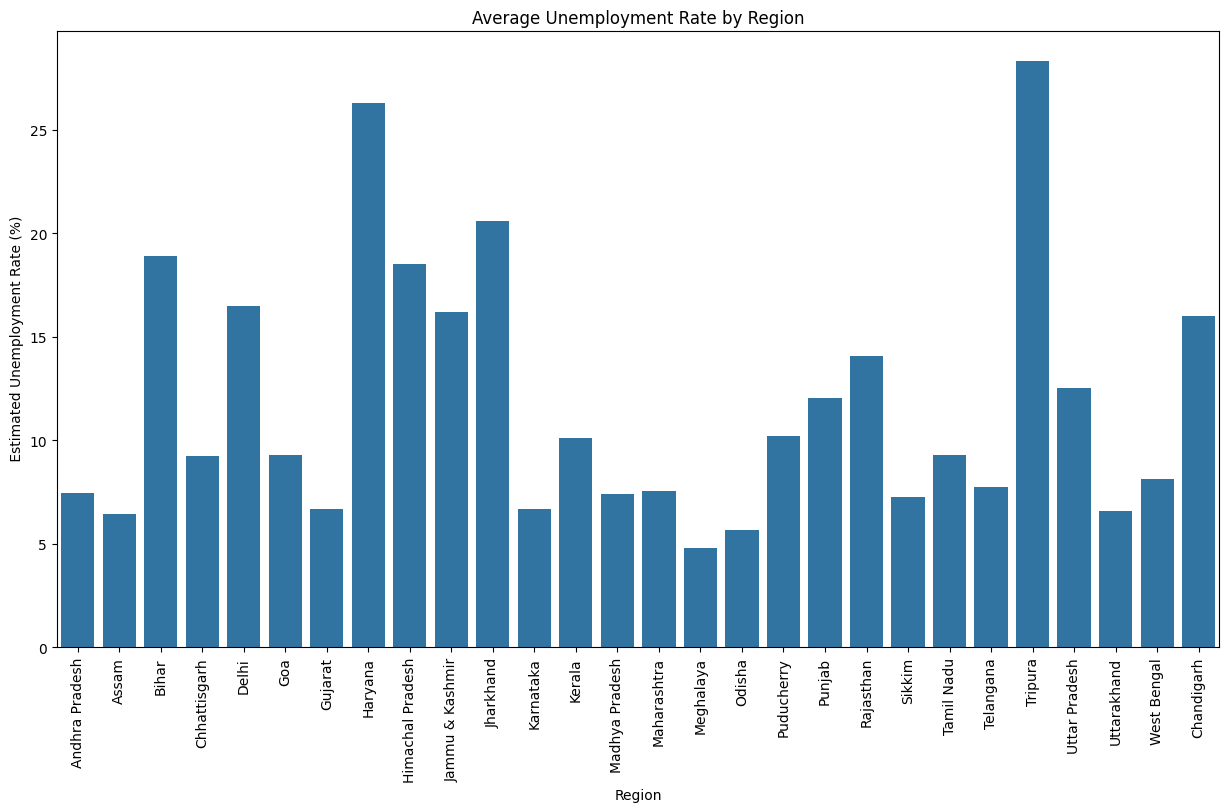

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(x="Region", y=" Estimated Unemployment Rate (%)", data=df, estimator=np.mean, ci=None)
plt.xticks(rotation=90)
plt.title("Average Unemployment Rate by Region")
plt.show()


In [28]:
df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)

,Estimated Unemployment Rate (%)
Region,
Tripura,28.350357
Haryana,26.283214
Jharkhand,20.585000
Bihar,18.918214
Himachal Pradesh,18.540357
Delhi,16.495357
Jammu & Kashmir,16.188571
Chandigarh,15.991667
Rajasthan,14.058214


In [29]:
df['Month'].unique()

array(['05', '06', '07', '08', '09', '10', '11', '12', '01', '02', '03',
       '04'], dtype=object)

<Axes: xlabel='Month', ylabel=' Estimated Unemployment Rate (%)'>

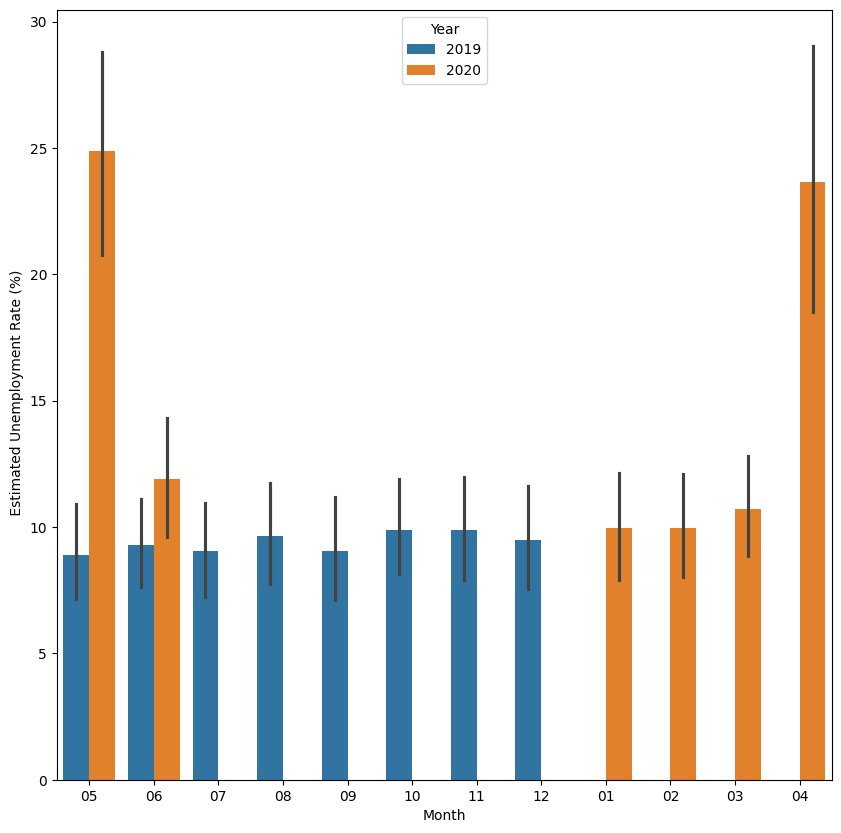

In [30]:
plt.figure(figsize=(10,10))
sns.barplot(x='Month' , y=' Estimated Unemployment Rate (%)' , hue='Year' , data=df)

In [31]:
df['Day'].unique()

array([' 31', ' 30', ' 29'], dtype=object)

In [32]:
df.columns

Index(['Region', ' Date', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'Day', 'Month', 'Year'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Estimated Unemployment Rate (%)          740 non-null    float64
 3    Estimated Employed                       740 non-null    float64
 4    Estimated Labour Participation Rate (%)  740 non-null    float64
 5   Area                                      740 non-null    object 
 6   Day                                       740 non-null    object 
 7   Month                                     740 non-null    object 
 8   Year                                      740 non-null    object 
dtypes: float64(3), object(6)
memory usage: 74.0+ KB


<Axes: xlabel='Day', ylabel=' Estimated Unemployment Rate (%)'>

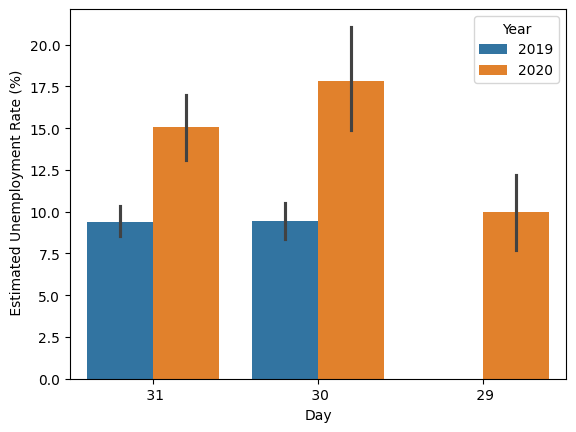

In [34]:
sns.barplot(x='Day' , hue='Year', y=' Estimated Unemployment Rate (%)' , data=df)

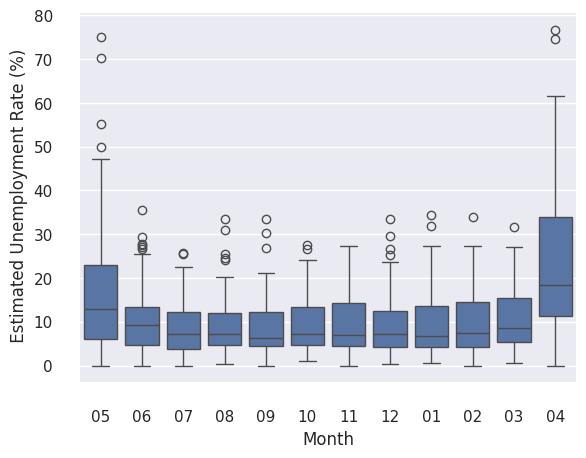

In [35]:
sns.set_theme(style='darkgrid')
sns.boxplot(x='Month' , y=' Estimated Unemployment Rate (%)' , data=df)
sns.despine(offset=10 , trim=True)

In [36]:
df.drop('Year' , axis=1)

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,Rural,31,05
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,Rural,30,06
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,Rural,31,07
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,Rural,31,08
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,Rural,30,09
...,...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,7.55,10871168.0,44.09,Urban,29,02
750,West Bengal,31-03-2020,6.67,10806105.0,43.34,Urban,31,03
751,West Bengal,30-04-2020,15.63,9299466.0,41.20,Urban,30,04
752,West Bengal,31-05-2020,15.22,9240903.0,40.67,Urban,31,05


<Axes: xlabel='Day', ylabel=' Estimated Unemployment Rate (%)'>

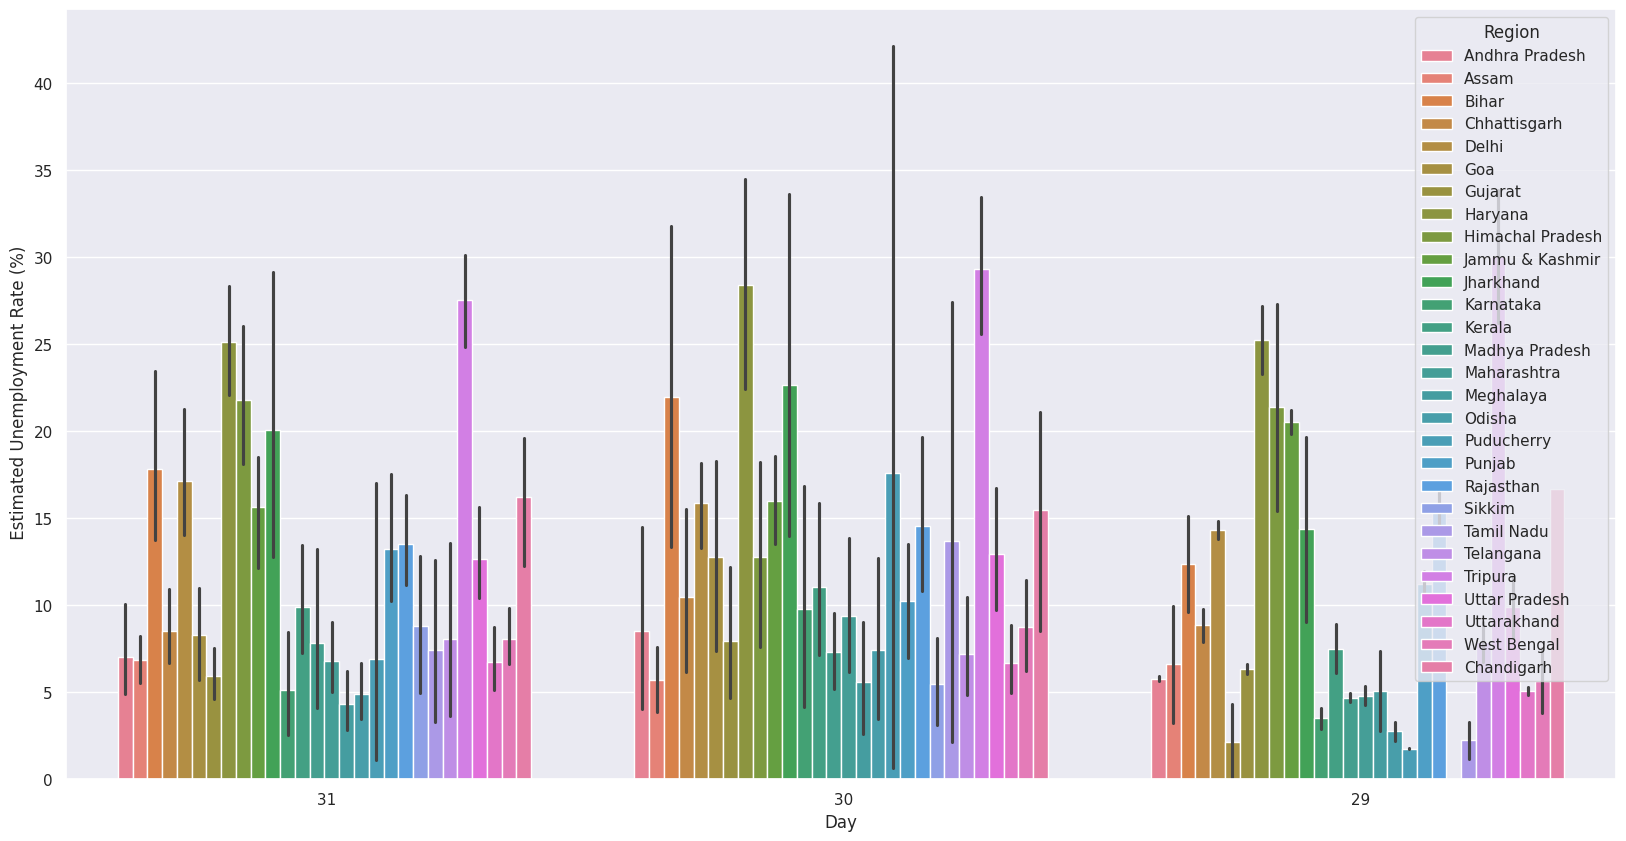

In [37]:
plt.figure(figsize=(20,10))
sns.barplot(x='Day' , hue='Region' , y=' Estimated Unemployment Rate (%)' , data=df)

# **END**